# 2012 Federal Election Commission Database

In [1]:
# Enable pylab mode
%pylab inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import pandas and load data
import pandas as pd

In [2]:
# Specify file path - Update as needed
fpath = '/Users/seanbarnes/Dropbox/Teaching/Workshops/Python/fec.csv'

In [5]:
# Load data
fec = pd.read_csv(fpath)
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
# Sample record
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [7]:
# Determine unique candidates
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [8]:
# Assign party affiliation to candidates
parties = {'Bachmann, Michelle' : 'Republican', 
           'Cain, Herman' : 'Republican',
           'Gingrich, Newt' : 'Republican',
           'Huntsman, Jon' : 'Republican',
           'Johnson, Gary Earl' : 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron' : 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick' : 'Republican',
           "Roemer, Charles E. 'Buddy' III":'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick' : 'Republican'}
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [9]:
# Restrict data to positive contributions - Removes 10,256 refunds
fec = fec[fec.contb_receipt_amt > 0]

In [10]:
# Create subset that includes two main candidtes (Obama, Romney)
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

## Donation Statistics by Occupation and Employer

In [11]:
# Number of donors by occupation
fec.contbr_occupation.value_counts()[:20]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
Name: contbr_occupat

In [12]:
# Clean up occupation and employer types
occ_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
               'INFORMATION REQUESTED' : 'NOT PROVIDED',
               'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
               'C.E.O.' : 'CEO'}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x,x)
fec.loc[:,'contbr_occupation'] = fec.contbr_occupation.map(f)


emp_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
               'INFORMATION REQUESTED' : 'NOT PROVIDED',
               'SELF' : 'SELF-EMPLOYED',
               'SELF EMPLOYED' : 'SELF-EMPLOYED'}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x,x)
fec.loc[:,'contbr_employer'] = fec.contbr_employer.map(f)

fec.contbr_occupation.value_counts()[:20]

RETIRED          233990
NOT PROVIDED      57151
ATTORNEY          34286
HOMEMAKER         29931
PHYSICIAN         23432
ENGINEER          14334
TEACHER           13990
CONSULTANT        13273
PROFESSOR         12555
NOT EMPLOYED       9828
SALES              8333
LAWYER             8283
MANAGER            8024
PRESIDENT          7758
STUDENT            7071
CEO                6526
OWNER              6343
EXECUTIVE          5506
SELF-EMPLOYED      5472
WRITER             5128
Name: contbr_occupation, dtype: int64

In [13]:
# Aggregate data by party and occupation - filter groups donating less than $2M overall
by_occupation = fec.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'party', aggfunc = 'sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm.applymap(lambda s: '%.2f' % s)

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


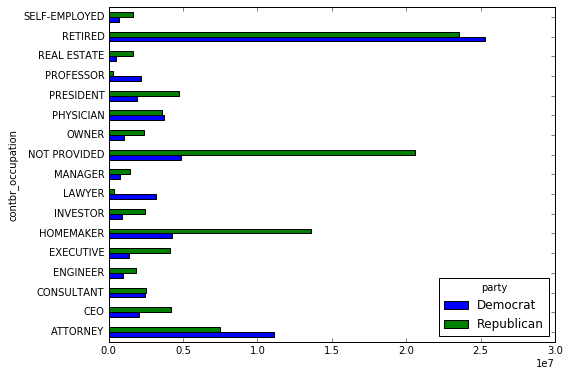

In [14]:
# Build a plot with the above data
over_2mm.plot(kind = 'barh', figsize=(8,6))

In [18]:
# Define function to get top amounts
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    # Order totals by key in descending order
    return totals.sort_values(ascending = False)[:n]

In [19]:
# Group by candidate name 
grouped = fec_mrbo.groupby('cand_nm')

In [20]:
# Report top donating occupations
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [21]:
# Report top donating employers
grouped.apply(get_top_amounts, 'contbr_employer', n=7)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                    

## Bucketing Donation Amounts

In [22]:
# Define bins and bucket donations into bins
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [23]:
# Sum donations
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


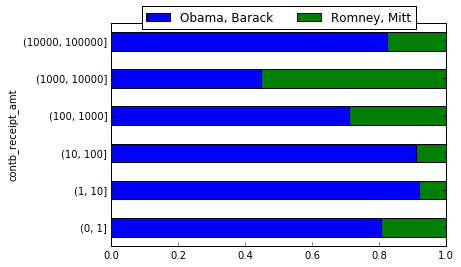

In [27]:
# Normalize donations
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis = 0)
normed_sums[:-2].plot(kind='barh', stacked = True).legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5,1.1))

## Donation Statistics by State

In [28]:
# Group data by candidate and state
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


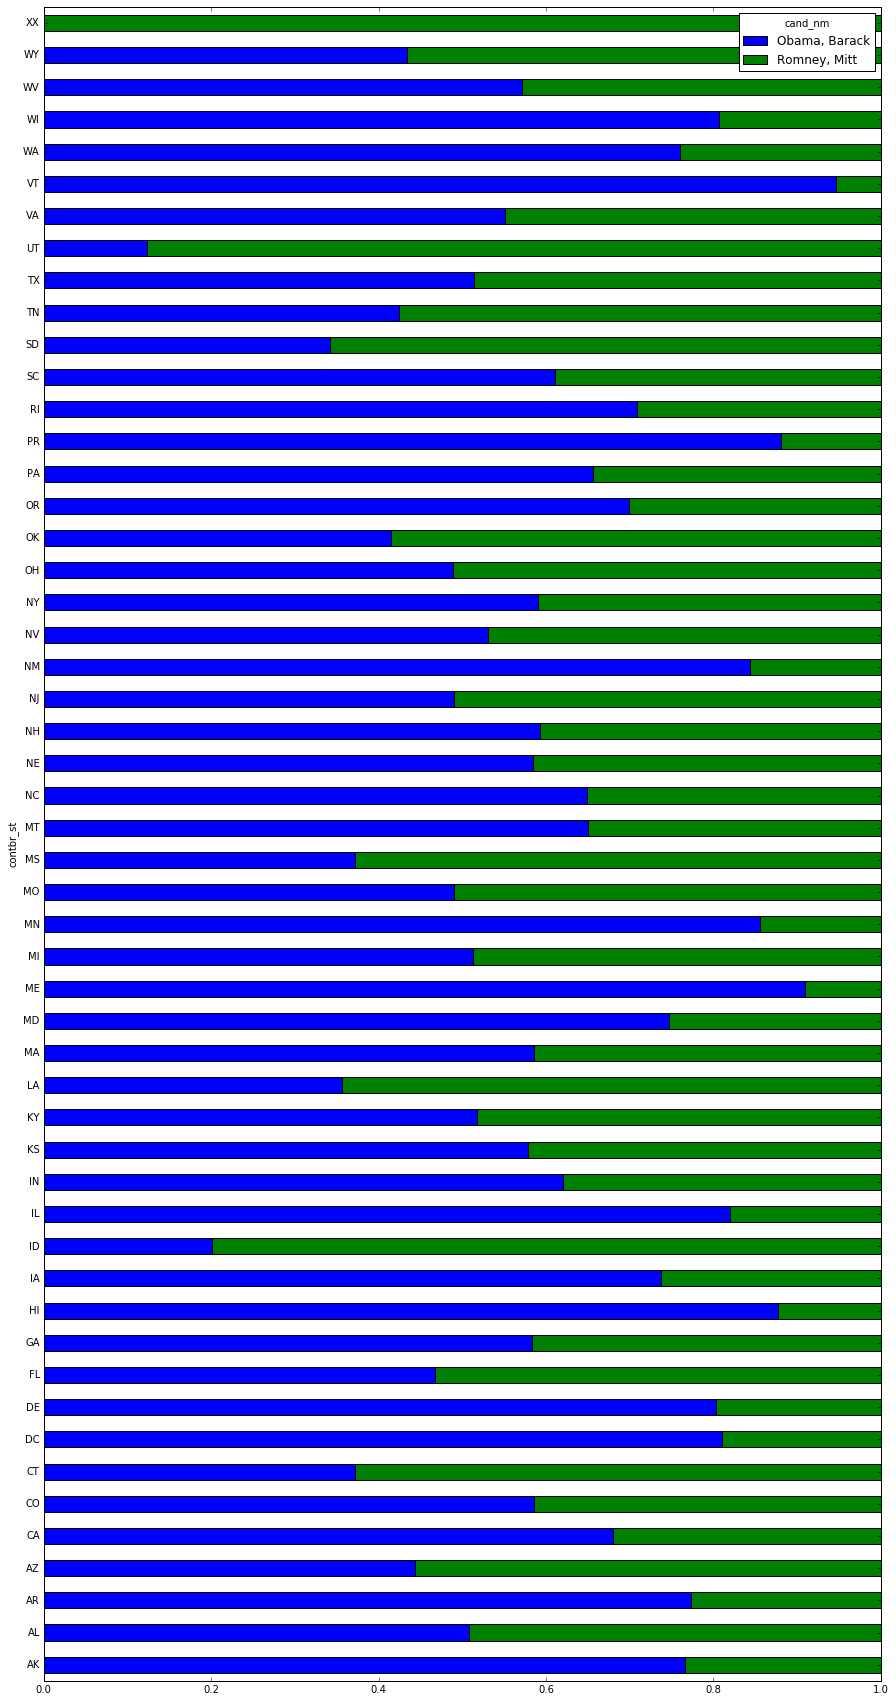

In [29]:
# Calculate percent donations by state
percent = totals.div(totals.sum(1), axis = 0)
percent.plot(kind='barh', figsize=(15,30), stacked = True)